# Natural Language Processing With Python's NLTK Package

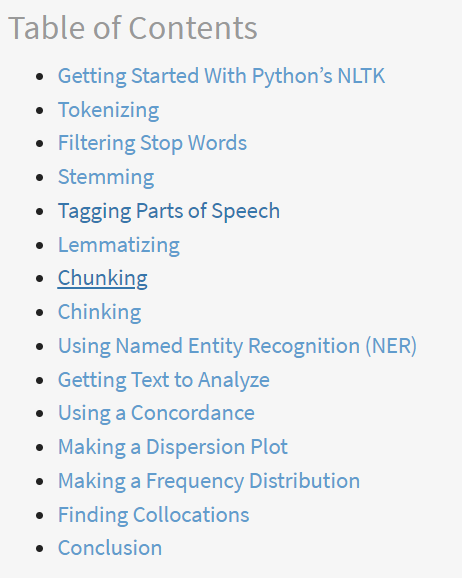
Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

A lot of the data that you could be analyzing is unstructured data and contains human-readable text. Before you can analyze that data programmatically, you first need to preprocess it.

# Getting Started With Python’s NLTK

In [1]:
#!pip install nltk 

# Tokenizing

By tokenizing, you can conveniently split up text by word or by sentence. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

When you’re analyzing text, you’ll be tokenizing by word and tokenizing by sentence.

**Tokenizing by word:** Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. 

**Tokenizing by sentence:** When you tokenize by sentence, you can analyze how those words relate to one another and see more context. 

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

You can use sent_tokenize() to split up example_string into sentences:

In [5]:
#tokenizing example_string by sentences:
print(sent_tokenize(example_string))

["\nMuad'Dib learned rapidly because his first training was in how to learn.", 'And the first lesson of all was the basic trust that he could learn.', "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]


In [6]:
#Now try tokenizing example_string by word:
print(word_tokenize(example_string))

["Muad'Dib", 'learned', 'rapidly', 'because', 'his', 'first', 'training', 'was', 'in', 'how', 'to', 'learn', '.', 'And', 'the', 'first', 'lesson', 'of', 'all', 'was', 'the', 'basic', 'trust', 'that', 'he', 'could', 'learn', '.', 'It', "'s", 'shocking', 'to', 'find', 'how', 'many', 'people', 'do', 'not', 'believe', 'they', 'can', 'learn', ',', 'and', 'how', 'many', 'more', 'believe', 'learning', 'to', 'be', 'difficult', '.']


But the following strings were also considered to be words:

    "'s"
    ','
    '.'
See how "It's" was split at the apostrophe to give you 'It' and "'s", but "Muad'Dib" was left whole? This happened because NLTK knows that 'It' and "'s" (a contraction of “is”) are two distinct words, so it counted them separately. But "Muad'Dib" isn’t an accepted contraction like "It's", so it wasn’t read as two separate words and was left intact.

# Filtering Stop Words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [7]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [9]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [10]:
stop_words = set(stopwords.words("english"))
filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]

In [11]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

 .casefold() on word so you could ignore whether the letters in word were uppercase or lowercase. This is worth doing because stopwords.words('english') includes only lowercase versions of stop words.
 
 You filtered out a few words like 'am' and 'a', but you also filtered out 'not', which does affect the overall meaning of the sentence.
 
 Words like 'I' and 'not' may seem too important to filter out, and depending on what kind of analysis you want to do, they can be. Here’s why:

**Content words** give you information about the topics covered in the text or the sentiment that the author has about those topics.

**Context words** give you information about writing style. You can observe patterns in how authors use context words in order to quantify their writing style. Once you’ve quantified their writing style, you can analyze a text written by an unknown author to see how closely it follows a particular writing style so you can try to identify who the author is.

'not' is technically an adverb but has still been included in NLTK’s list of stop words for English. So, 'I' and 'not' can be important parts of a sentence, but it depends on what you’re trying to learn from that sentence.

# Stemming

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

In [12]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
stemmer = PorterStemmer()

In [14]:
string_for_stemming = """
... The crew of the USS Discovery discovered many discoveries.
... Discovering is what explorers do."""

Before you can stem the words in that string, you need to separate all the words in it:

In [15]:
words = word_tokenize(string_for_stemming)

In [16]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

Create a list of the stemmed versions of the words in words by using stemmer.stem() in a list comprehension:

In [17]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

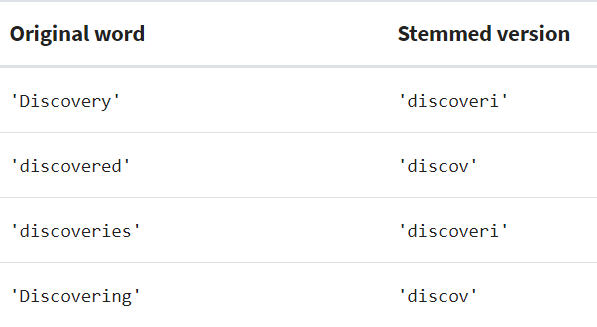
Understemming and overstemming are two ways stemming can go wrong:

1. Understemming happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
2. Overstemming happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

The Porter stemming algorithm dates from 1979, so it’s a little on the older side. 

Fortunately, you have some other ways to reduce words to their core meaning, such as lemmatizing, which you’ll see later in this tutorial. But first, we need to cover parts of speech.

# Tagging Parts of Speech

Part of speech is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.
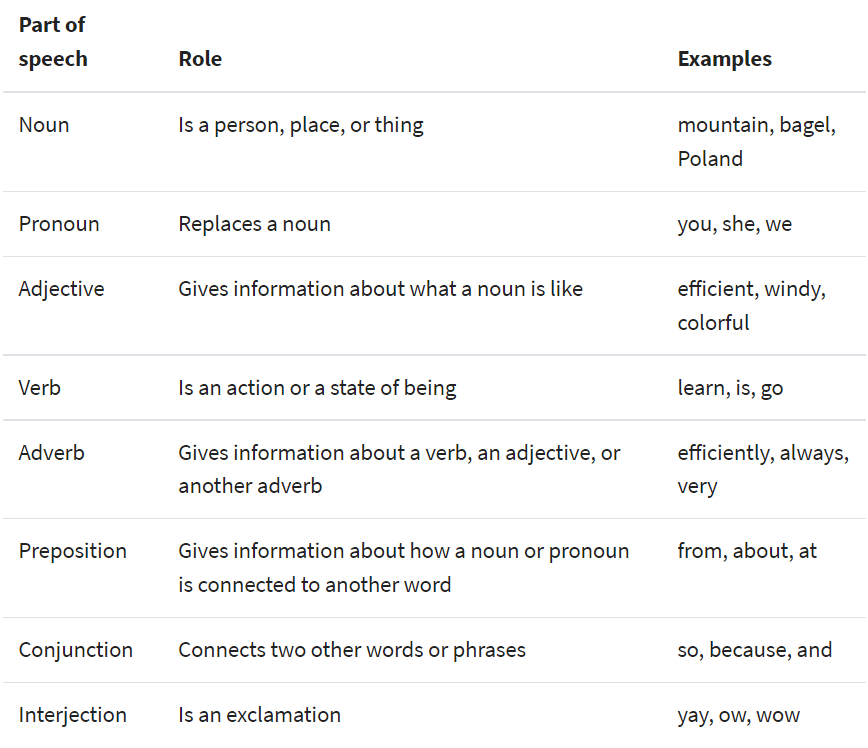
Some sources also include the category articles (like “a” or “the”) in the list of parts of speech, but other sources consider them to be adjectives. NLTK uses the word determiner to refer to articles.


In [18]:
from nltk.tokenize import word_tokenize

In [19]:
sagan_quote = """
... If you wish to make an apple pie from scratch,
... you must first invent the universe."""

In [20]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [21]:
import nltk
nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [22]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


    'pie' was tagged NN because it’s a singular noun.
    'you' was tagged PRP because it’s a personal pronoun.
    'invent' was tagged VB because it’s the base form of a verb.    

In [23]:
jabberwocky_excerpt = """
... 'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
... all mimsy were the borogoves, and the mome raths outgrabe."""

In [24]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

In [25]:
import nltk
nltk.pos_tag(words_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

# Lemmatizing

lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

Note: A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.

In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.


In [26]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
lemmatizer.lemmatize("scarves")

'scarf'

In [29]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

In [30]:
words = word_tokenize(string_for_lemmatizing)

In [31]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [32]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [33]:
lemmatizer.lemmatize("worst")

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [34]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

# Chunking

While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

Note: A phrase is a word or group of words that works as a single unit to perform a grammatical function. Noun phrases are built around a noun.

Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

In [35]:
from nltk.tokenize import word_tokenize

In [36]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [37]:
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [38]:
nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

You’ve got a list of tuples of all the words in the quote, along with their POS tag. In order to chunk, you first need to define a chunk grammar.

Note: A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

In [39]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

NP stands for noun phrase. You can learn more about noun phrase chunking in Chapter 7 of Natural Language Processing with Python—Analyzing Text with the Natural Language Toolkit.

According to the rule you created, your chunks:

    Start with an optional (?) determiner ('DT')
    Can have any number (*) of adjectives (JJ)
    End with a noun (<NN>)
Create a chunk parser with this grammar:

In [40]:
# Import required libraries
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [41]:
chunk_parser = nltk.RegexpParser(grammar)

In [42]:
tree = chunk_parser.parse(lotr_pos_tags)

In [43]:
# Example text
sample_text = "The quick brown fox jumps over the lazy dog"
# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(sample_text))
grammar = "NP: {<DT>?<JJ>*<NN>}"
#Extract all parts of speech from any text
chunker = RegexpParser(grammar)
# Print all parts of speech in above sentence
output = chunker.parse(tagged)
print('After Extractingn', output)

After Extractingn (S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumps/VBZ
  over/IN
  (NP the/DT lazy/JJ dog/NN))


In [44]:
import nltk
nltk.data
nltk.decorators
nltk.downloader
nltk.draw
nltk.draw.tree

<module 'nltk.draw.tree' from 'C:\\Users\\rahul\\anaconda3\\lib\\site-packages\\nltk\\draw\\tree.py'>

In [45]:
output.draw()

In [46]:
chunk_parser = nltk.RegexpParser(grammar)

In [47]:
tree = chunk_parser.parse(lotr_pos_tags)

In [48]:
tree.draw()

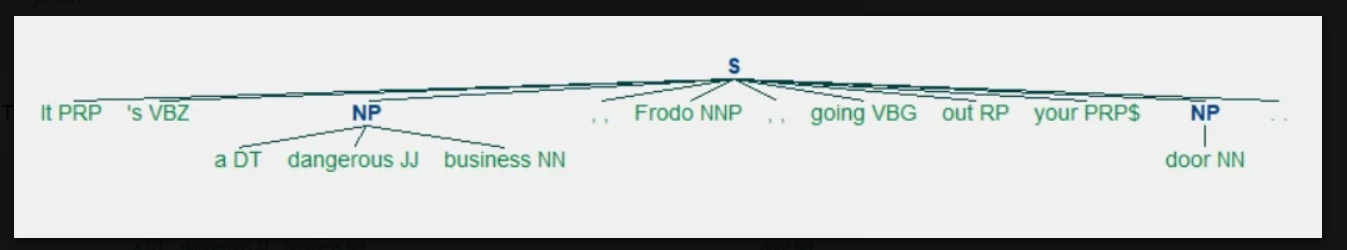

# Chinking

Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

In [49]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [50]:
grammar = """
... Chunk: {<.*>+}
...        }<JJ>{"""

The first rule of your grammar is {<.*>+}. This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: <.*>+.

The second rule of your grammar is }<JJ>{. This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: <JJ>.

In [51]:
chunk_parser = nltk.RegexpParser(grammar)

In [52]:
tree = chunk_parser.parse(lotr_pos_tags)

In [53]:
tree

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [Tree('Chunk', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT')]), ('dangerous', 'JJ'), Tree('Chunk', [('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])])

In [54]:
tree.draw()

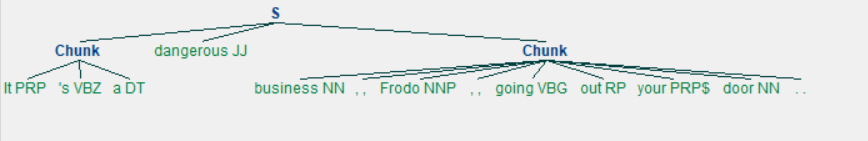
Here, you’ve excluded the adjective 'dangerous' from your chunks and are left with two chunks containing everything else. The first chunk has all the text that appeared before the adjective that was excluded. The second chunk contains everything after the adjective that was excluded.

Now that you know how to exclude patterns from your chunks, it’s time to look into named entity recognition (NER).

# Using Named Entity Recognition (NER)

Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are.

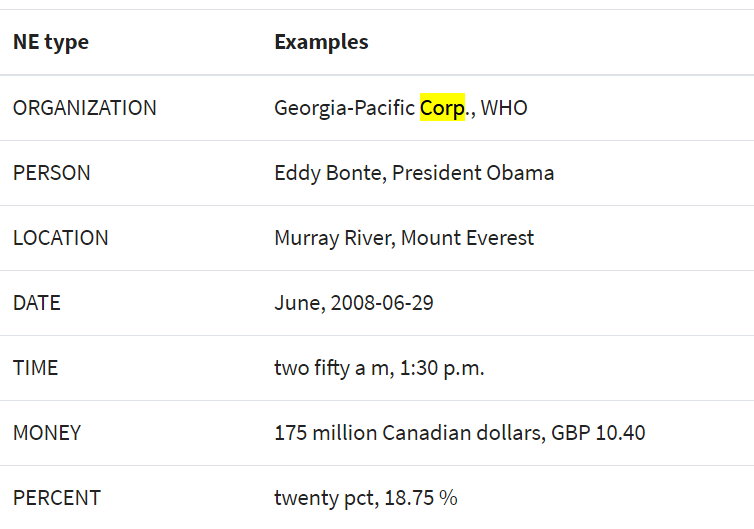

You can use nltk.ne_chunk() to recognize named entities. Let’s use lotr_pos_tags again to test it out:

In [55]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
tree = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [56]:
tree.draw()

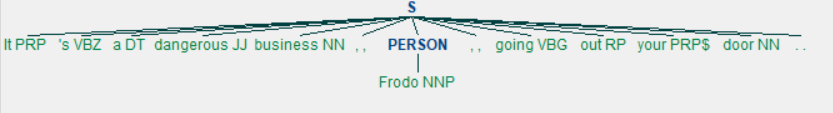

See how Frodo has been tagged as a PERSON? You also have the option to use the parameter binary=True if you just want to know what the named entities are but not what kind of named entity they are:

In [57]:
tree = nltk.ne_chunk(lotr_pos_tags, binary=True)
tree.draw()

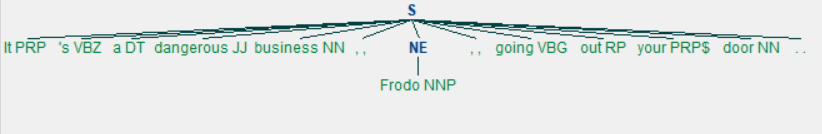

In [58]:
quote = """
... Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
... for countless centuries Mars has been the star of war—but failed to
... interpret the fluctuating appearances of the markings they mapped so well.
... All that time the Martians must have been getting ready.
...
... During the opposition of 1894 a great light was seen on the illuminated
... part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
... and then by other observers. English readers heard of it first in the
... issue of Nature dated August 2."""

Now create a function to extract named entities:

In [59]:
def extract_ne(quote):
        words = word_tokenize(quote, language='english')
        tags = nltk.pos_tag(words)
        tree = nltk.ne_chunk(tags, binary=True)
        return set(
            " ".join(i[0] for i in t)
            for t in tree
            if hasattr(t, "label") and t.label() == "NE"
        )

With this function, you gather all named entities, with no repeats. In order to do that, you tokenize by word, apply part of speech tags to those words, and then extract named entities based on those tags. Because you included binary=True, the named entities you’ll get won’t be labeled more specifically. You’ll just know that they’re named entities.

In [60]:
extract_ne(quote)

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

# Getting Text to Analyze

A group of texts is called a corpus. NLTK provides several corpora covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires nltk.download("book"), which is a pretty big download:


In [61]:
nltk.download("book")
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\rahul\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Using a Concordance

When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.


In [62]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [63]:
text9.concordance("man")

Displaying 25 of 276 matches:
[ The Man Who Was Thursday by G . K . Chesterto
as nevertheless artistic . That young man with the long , auburn hair and the i
r and the impudent face -- that young man was not really a poet ; but surely he
 a frail but finished work of art . A man who stepped into its social atmospher
these new women would always pay to a man the extravagant compliment which no o
poet , was really ( in some sense ) a man worth listening to , even if one only
ht you appeared in this garden ." The man with the meek blue eyes and the pale 
ere . An anarchist is an artist . The man who throws a bomb is an artist , beca
o miss it . We feel it is epical when man with one wild arrow strikes a distant
ant bird . Is it not also epical when man with one wild engine strikes a distan
 , to Baker Street or to Bagdad . But man is a magician , and his whole magic i
ron , who commemorates the defeats of man ; give me Bradshaw , who commemorates
ast batteries of besiegers , and that man 

In [64]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


# Making a Dispersion Plot

You can use a dispersion plot to see how much a particular word appears and where it appears.

In [65]:
nltk.data
nltk.decorators
nltk.downloader
nltk.draw
nltk.draw.dispersion

<module 'nltk.draw.dispersion' from 'C:\\Users\\rahul\\anaconda3\\lib\\site-packages\\nltk\\draw\\dispersion.py'>

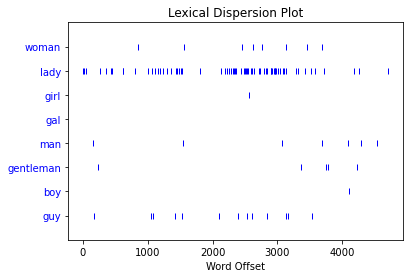

In [66]:
text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"])

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole. This plot shows that:

    "lady" was used a lot more than "woman" or "girl". There were no instances of "gal".
    "man" and "guy" were used a similar number of times and were more common than "gentleman" or "boy".
You use a dispersion plot when you want to see where words show up in a text or corpus. If you’re analyzing a single text, this can help you see which words show up near each other. If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.


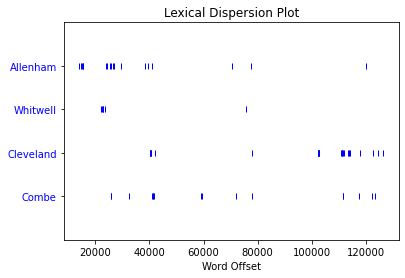

In [67]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

# Making a Frequency Distribution

With a frequency distribution, you can check which words show up most frequently in your text. You’ll need to get started with an import:


In [68]:
from nltk import FreqDist

FreqDist is a subclass of collections.Counter. Here’s how to create a frequency distribution of the entire corpus of personals ads:

In [69]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [70]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [71]:
# a lot of stop words in your frequency distribution, but you can remove them
meaningful_words = [word for word in text8 if word.casefold() not in stop_words]

In [72]:
frequency_distribution = FreqDist(meaningful_words)

In [73]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

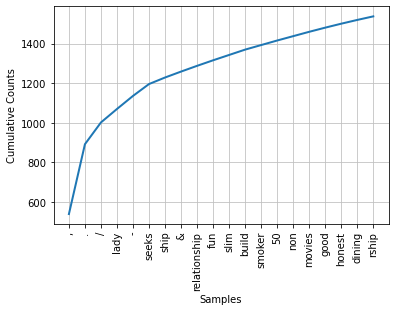

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [74]:
frequency_distribution.plot(20, cumulative=True)

# Finding Collocations

A collocation is a sequence of words that shows up often. Here are some examples of collocations that use the word “tree”:

    Syntax tree
    Family tree
    Decision tree
To see pairs of words that come up often in your corpus, you need to call .collocations() on it:

In [75]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


But what would happen if you looked for collocations after lemmatizing the words in your corpus?

In [76]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]

In [77]:
new_text = nltk.Text(lemmatized_words)

In [78]:
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build


This is a practise work.

Source:- https://realpython.com/nltk-nlp-python/#tagging-parts-of-speech